In [1]:
import os
import torch
import numpy as np

from CODE.AttentionDCA_python.src.plot_functions import contact_plot
from CODE.AttentionDCA_python.src.dcascore import score, compute_PPV
from CODE.AttentionDCA_python.src.utils import quickread

cwd = os.getcwd()
print(cwd)

filename = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_concatenated_nodupli.fasta'
structfile = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'

Z, W = quickread(filename)
W = W / W.sum()
q = int(Z.max()) + 1
N, M = Z.shape

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA
Total sequences read: 15539
Sequences after filtering: 15539
Sampling 100000 pairs out of 120722491 total pairs.
Mean fraction of identical positions (sampled): 0.3125928977272727
Computed theta: 0.3890043596130968


100%|██████████| 15539/15539 [00:11<00:00, 1343.19it/s]

3515.9189003436304


In [2]:
def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)
    return tensor

In [8]:
loss_type = 'without_J'

family = 'HK-RR_w_mask64_redoing_11_14_7'
H = 32
d= 23
n_epochs = 500
K32_23_w_mask64_11 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask64_11 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask64_11 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

176


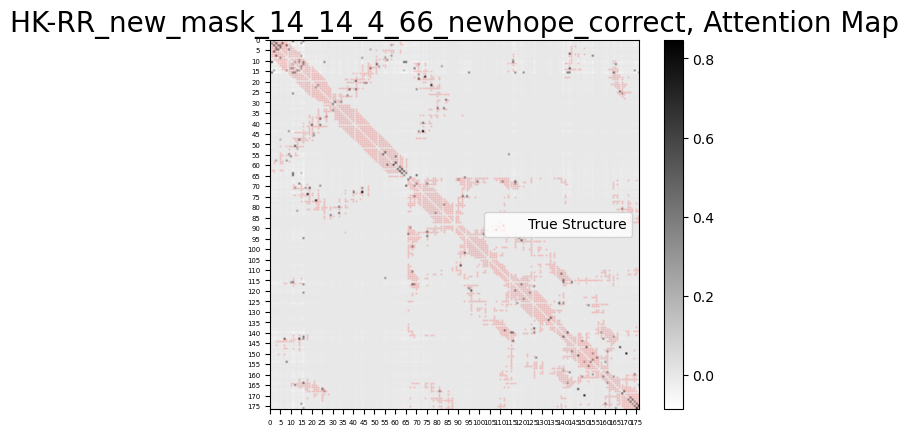

In [9]:
from CODE.AttentionDCA_python.src.plot_functions import graphAtt
N =Q32_23_w_mask64_11.shape[-1]
print(N)
# Define other parameters
family = 'HK-RR_new_mask_14_14_4_66_newhope_correct'
H = 32
d= 23
epochs = 300

PFname = family

ticks = np.arange(0, N, 5)  # Example tick positions

k=10

# Call graphAtt function
graphAtt(Q32_23_w_mask64_11, K32_23_w_mask64_11, V32_23_w_mask64_11, 
         structfile, PFname, ticks, k=k, version='mean', sqr=False, APC=True, all = False, head_mask= 64, H1= 11, H2=11+14 )

In [10]:
ranking32_23_w_mask64_11, _ = score(Q32_23_w_mask64_11, K32_23_w_mask64_11, V32_23_w_mask64_11, separation_heads= 64, H1 =11, H2=25)

176


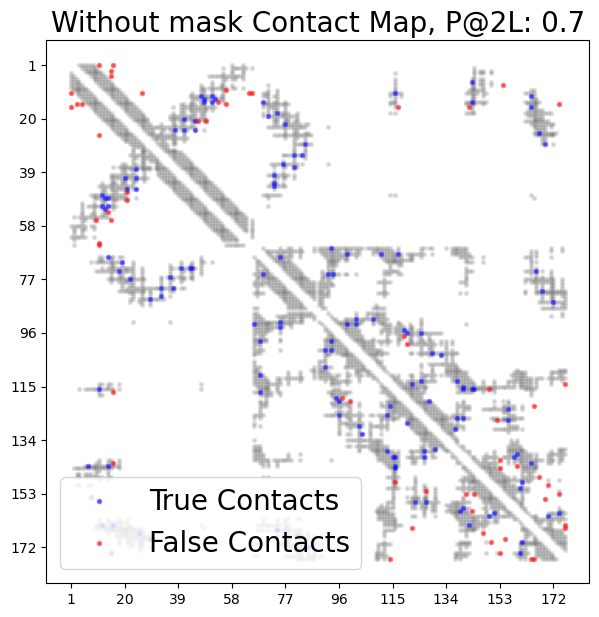

In [14]:
#N = 100  # Number of top predictions to consider

ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 100
# Call the contact_plot function

figurename = 'Without mask'
fake32_23_wo_mask = contact_plot(ranking32_23_w_mask64_11, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")